In [1]:
import pandas as pd
import numpy as np
import string
from string import digits
import matplotlib.pyplot as plt
%matplotlib inline
import re
import random
from collections import Counter
# pickle.dump(word2vec,open("glove.6B.50d.pkl","wb"))

In [2]:
np.random.uniform(-2,2,size=10)

array([ 0.19116773, -1.99805743, -1.619961  , -0.97143754,  0.88085232,
        0.27035025, -1.58590642, -1.79325104,  0.51418684, -0.94944497])

In [3]:
# from gensim.models import KeyedVectors
# dataDIR = 'C:\\Users\\Nirvan S P Theethira\\Desktop\\MiMic\\data\\GoogleNews-vectors-negative300.bin.gz'
# model = KeyedVectors.load_word2vec_format(dataDIR, binary=True)
# word2vec = {i:model[i] for i in list(model.vocab.keys())}

# Data

In [4]:
data_path = 'joey.npy'
if '.npy' in data_path:
    lines = str(np.load(data_path)).split('\n')

In [5]:
input_lines = list()
target_lines = list()
for line in lines[0:500]:
    if len(line):
        inp,target = line.split('\t')
        input_lines.append(inp)
        target_lines.append('<BOS> '+ target + ' <EOS>')

In [2]:
import codecs
with codecs.open("encoder_inputs.txt", "rb", encoding="utf-8", errors="ignore") as f:
    lines = f.read().split("\n")
    encoder_text = []
    for line in lines:
        data = line.split("\n")[0]
        encoder_text.append(data)
with codecs.open("decoder_inputs.txt", "rb", encoding="utf-8", errors="ignore") as f:
    lines = f.read().split("\n")
    decoder_text = []
    for line in lines:
        data = line.split("\n")[0]
        decoder_text.append(data)

# Vectors

## One-Hot Vectors

In [3]:
num_samples = 500
encoder_text = encoder_text[:num_samples]
decoder_text = decoder_text[:num_samples]
full_text = encoder_text + decoder_text

In [4]:
def createVocab(word2vec):
    #         min([j for i in word2vec.values() for j in i])
    self.embeddingDim = len(list(word2vec.values())[0])
    word2vec[self.START] = np.zeros(self.embeddingDim)
    word2vec[self.END] = np.zeros(self.embeddingDim)

    self.vocabSize = len(word2vec) + 1
    self.word2index = defaultdict(int)
    self.index2word = defaultdict(str)

    self.word2index[self.UNK] = 0
    self.index2word[0] = self.UNK

    embeddingWeights = np.zeros((self.vocabSize +1, self.embeddingDim))
    for index,(word,vector) in enumerate(word2vec.items()):
        self.word2index[word] = index+1
        self.index2word[index+1] = word
        embeddingWeights[index+1] = vector

    return embeddingWeights

In [5]:
# from keras.preprocessing.text import Tokenizer
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(full_text)
# word_index = tokenizer.word_index

# encoder_sequences = tokenizer.texts_to_sequences(encoder_text)
# decoder_sequences = tokenizer.texts_to_sequences(decoder_text)
# decoder_output_data = np.zeros((num_samples, decoder_input_data.shape[1], len(word2index)), dtype="float32")
# for i, seqs in enumerate(decoder_input_data[0:498]):
#     for j, seq in enumerate(seqs):
#         if j > 0:
#             decoder_output_data[i][j][seq] = 1.

In [6]:
word2index = {word:index+1 for index,(word,freq) in enumerate(Counter(re.sub('\s+',' ',' '.join(full_text)).split()).items())}
word2index['<UnKnown_Token>'] = 0

In [7]:
index2word = {}
for k, v in word2index.items():
    index2word[v] = k

In [8]:
encoder_sequences = []
for sent in encoder_text:
    encoder_sequences.append([word2index[word] for word in sent.split()])

In [9]:
decoder_sequences = []
for sent in decoder_text:
    decoder_sequences.append([word2index[word] for word in sent.split()])

In [10]:
MAX = max([len(i) for i in decoder_sequences])
decoder_output_data = []
for sents in decoder_sequences[0:10]:
    sents = sents[1:]
    oneHot = [[0 for i in range(len(word2index))] for j in range(MAX)]
#     oneHot = np.zeros((MAX,len(word2index)))
    for idx,word in enumerate(sents):
        oneHot[idx][word] = 1.
    decoder_output_data.append(oneHot)
decoder_output_data = np.array(decoder_output_data)

In [11]:
from keras.preprocessing.sequence import pad_sequences
encoder_input_data = pad_sequences(encoder_sequences, dtype='int32', padding='post', truncating='post')
decoder_input_data = pad_sequences(decoder_sequences, dtype='int32', padding='post', truncating='post')

Using TensorFlow backend.
C:\Python\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Python\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Python\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Python\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning:

In [12]:
sent = 9
print(encoder_text[sent])
print([i for i in encoder_input_data[sent]])
# print([index2word[i] for i in encoder_input_data[sent]])
print()
print(decoder_text[sent])
print([i for i in decoder_input_data[sent]])
# print([index2word[i] for i in decoder_input_data[sent]])
print([[idx for idx,j in enumerate(i) if j==1] for i in decoder_output_data[sent]])
print([[index2word[idx] for idx,j in enumerate(i) if j==1] for i in decoder_output_data[sent]])  

that i am used to
[40, 6, 18, 41, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

<BOS> yeah but these guys have never seen a horse  they just jack off to clint eastwood <EOS>
[1280, 27, 112, 497, 141, 51, 187, 660, 10, 1289, 501, 147, 1290, 643, 20, 1291, 1292, 1281, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[27], [112], [497], [141], [51], [187], [660], [10], [1289], [501], [147], [1290], [643], [20], [1291], [1292], [1281], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [],

## Word2vec

In [13]:
embeddings_index = {}
with open('C:\\Users\\Nirvan S P Theethira\\Desktop\\MiMic\\data\\glove.6B.50d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()

print("Glove Loded!")

Glove Loded!


In [14]:
embedding_dimention = 50
def embedding_matrix_creater(embedding_dimention, word_index):
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dimention))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
          # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

In [15]:
embedding_matrix = embedding_matrix_creater(50, word_index=word2index)

In [16]:
from keras.layers import Embedding
from keras.layers import Input, Dense, LSTM, TimeDistributed
from keras.models import Model

In [17]:
embed_layer = Embedding(input_dim=len(word2index)+1, output_dim=50, trainable=True,)
embed_layer.build((None,))
embed_layer.set_weights([embedding_matrix])

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
embed_layer.get_weights()[0][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

# Model

In [19]:
encoder_inputs = Input(shape=(None, ), dtype='int32',)
encoder_embedding = embed_layer(encoder_inputs)
encoder_LSTM = LSTM(50, return_state=True)
encoder_outputs, state_h, state_c = encoder_LSTM(encoder_embedding)

decoder_inputs = Input(shape=(None, ), dtype='int32',)
decoder_embedding = embed_layer(decoder_inputs)
decoder_LSTM = LSTM(50, return_state=True, return_sequences=True)
decoder_outputs, _, _ = decoder_LSTM(decoder_embedding, initial_state=[state_h, state_c])

decoder_dense = TimeDistributed(Dense(len(word2index), activation='softmax'))
outputs = decoder_dense(decoder_outputs)
model = Model([encoder_inputs, decoder_inputs], outputs)
model.compile(optimizer='adam', loss ='categorical_crossentropy', metrics = ['accuracy'])

In [69]:
def getDecodeOut(vocabSize, decodeIn, MAX):
    decodeOut = []
    for sent in decodeIn:
        sent = sent[1:]
        oneHot = [[0. for i in range(vocabSize)] for j in range(MAX)]
        for idx,word in enumerate(sent):
            oneHot[idx][word] = 1.
        decodeOut.append(oneHot)
    return np.array(decodeOut)

def dataGen(encoder_sequences, decoder_sequences, batchSize=10):
    MAX = max([len(i) for i in decoder_sequences])
    number_of_batches = len(encoder_sequences)/batchSize
    encoder_input_data = pad_sequences(encoder_sequences, dtype='int32', padding='post', truncating='post')
    decoder_input_data = pad_sequences(decoder_sequences, dtype='int32', padding='post', truncating='post')
    counter=0
    while(True):
        prev = batchSize*counter
        nxt = batchSize*(counter+1)
        decoderOut = getDecodeOut(len(word2index), decoder_sequences[prev:nxt], MAX)
        counter+=1
        yield [encoder_input_data[prev:nxt], decoder_input_data[prev:nxt]], decoderOut
        
        if counter>=number_of_batches:
            counter=0

# def getDecodeOut(vocabSize, decodeIn):
#     oneHot = [[0. for i in range(vocabSize)] for j in range(len(decodeIn))]
#     decodeIn = decodeIn[1:]
#     for idx,word in enumerate(decodeIn):
#         oneHot[idx][word] = 1.
#     return np.array([oneHot])

# def dataGen(encoder_sequences, decoder_sequences):
#     totalPoints = len(encoder_sequences)
#     i = -1
#     while(1):
#         decoderOut = getDecodeOut(len(word2index), decoder_sequences[i])
#         i+=1
#         yield [np.array([encoder_sequences[i]]), np.array([decoder_sequences[i]])], decoderOut
        
#         if i>=totalPoints-1:
#             i=-1
    

In [63]:
MAX = max([len(i) for i in decoder_sequences])
g = dataGen(encoder_sequences,decoder_sequences,MAX)

In [64]:
l = next(g)

In [67]:
l[0][0]

array([[  1,   2,   3, ...,   0,   0,   0],
       [  6,   7,   2, ...,   0,   0,   0],
       [  8,   9,  10, ...,   0,   0,   0],
       ...,
       [  6, 279, 343, ...,   0,   0,   0],
       [343,   8, 230, ...,   0,   0,   0],
       [  6, 354, 355, ...,   0,   0,   0]])

In [ ]:
for i in l[1][1]:
    print([idx for idx,j in enumerate(i) if j==1])

In [48]:
g = dataGen(encoder_sequences[0:3],decoder_sequences[0:3])

In [68]:
k[0][0]

array([[ 8,  9, 10, 11,  6,  9, 12, 13]])

In [55]:
k = next(g)
k

([array([[ 8,  9, 10, 11,  6,  9, 12, 13]]),
  array([[1280,  116,   14, 1284,   62,    4, 1285, 1281]])],
 array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]]))

In [56]:
for i in k[1][0]:
    print([idx for idx,j in enumerate(i) if j==1])

[8]
[717]
[39]
[2]
[1282]
[102]
[20]
[10]
[515]
[62]
[1283]
[139]
[1281]
[]


In [70]:
size=10
history = model.fit_generator(dataGen(encoder_sequences[0:size], decoder_sequences[0:size]), epochs=3, steps_per_epoch = 1)

Epoch 1/3


InvalidArgumentError: Incompatible shapes: [1,18] vs. [1,3]
	 [[{{node metrics/acc/Equal}}]]

In [73]:
# size=10
# history = model.fit_generator(dataGen(encoder_sequences[0:size], decoder_sequences[0:size], batchSize=10), epochs=3, steps_per_epoch = len(encoder_sequences[0:size])/10)

Epoch 1/3
1/1 [==============================] - 2s 2s/step - loss: 3.2090 - acc: 0.0000e+00
Epoch 2/3
1/1 [==============================] - 0s 42ms/step - loss: 3.1999 - acc: 0.0056
Epoch 3/3
1/1 [==============================] - 0s 37ms/step - loss: 3.1906 - acc: 0.0056


In [74]:
# history = model.fit([encoder_input_data[0:10], decoder_input_data[0:10]], 
#                      decoder_output_data[0:10], 
#                      epochs=1)

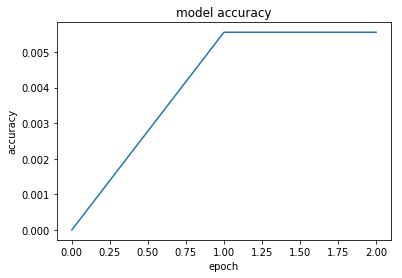

In [75]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [76]:
history.history['loss']

[3.209014892578125, 3.1999237537384033, 3.190570116043091]

In [77]:
# decoder_state_input_h = Input(shape=(None,))
# decoder_state_input_c = Input(shape=(None,))
# decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

# decoder_outputs2, state_h2, state_c2 = model.layers[4](model.layers[2](model.inputs[-1]), initial_state=decoder_states_inputs)
# decoder_states2 = [state_h2, state_c2]
# decoder_outputs2 = model.layers[-1](decoder_outputs2)
# decoder_model = Model([model.inputs[-1]] + decoder_states_inputs, [decoder_outputs2] + decoder_states2)

# _, state_h, state_c = model.layers[3](model.layers[2](model.inputs[0]))
# encoder_model = Model(model.inputs[0], [state_h, state_c])

_, stateH, stateC = model.layers[3](model.layers[2](model.inputs[0]))
encoder = Model(model.inputs[0], [stateH, stateC])

inputH = Input(shape=(None,))
inputC = Input(shape=(None,))

decoderOut, stateH2, stateC2 = model.layers[4](model.layers[2](model.inputs[-1]), 
                                                            initial_state=[inputH, inputC])
decoder = Model([model.inputs[-1]] + [inputH, inputC], 
                           [model.layers[-1](decoderOut)] + [stateH2, stateC2])

In [78]:
input_seq = encoder_sequences[50]
[index2word[i] for i in input_seq]

['no',
 'kidding',
 'he',
 'is',
 'a',
 'criminal',
 'i',
 'heard',
 'he',
 'lit',
 'a',
 'state',
 'trooper',
 'on',
 'fire',
 'he',
 'just',
 'got',
 'out',
 'of',
 'alcatraz']

In [ ]:
statesValue = encoder.predict(input_seq)

decoderInp = np.zeros((1,1))
decoderInp[0, 0] = word2index['<BOS>']

reply = ''
while(1):
    outputTok, h, c = decoder.predict([decoderInp] + statesValue)

    predToken = np.argmax(outputTok[0][0])
    predWord = index2word[predToken]
    print(predWord,predToken)
    if (predWord == '<EOS>'):
        break

    reply += predWord + ' '
    
    decoderInp[0, 0] = predToken

    statesValue = [h, c]

sometimes 563
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
your

yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yours

yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yours

zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102


thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zippe

zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102

thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zippe

yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yours

zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
y

yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497
strike 601
yourself 102
yourself 102
yourself 102
yourself 102
yourself 102
thousand 625
yourself 102
yourself 102
yourself 102
yourself 102
zipper 1285
zipper 1285
zipper 1285
art 1497

In [69]:
reply

'exactly '